In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotnine import *
import sys
sys.path.append("../src/")
from src import *

def read_sample_chroms(sample):
    data_dir = f"../processed-data/admixfrog-allentoft/{sample}"

    singlechroms = []
    for i in range(1, 23):
        file_i = f"{data_dir}/{i}.rle.xz"
        if os.path.exists(file_i):
            df_i = pd.read_csv(file_i)
            singlechroms.append(df_i)
        else:
            print(f"Sample {sample}: No result file for chrom {i}")

    df = pd.concat(singlechroms)
    df = filter_output(df)
    return df

def filter_output(df):    
    # Filter to remove the state annotations
    df = df.loc[df["type"] != "state"]
    # Remove any archaic calls that are shorter than 0.05 cM
    min_len = .05
    df = df.drop(df.loc[(df['map_len']  < min_len) & (df['target'] != 'AFR')].index)
    return df

def plot_introgression(sample, df=None, suffix = ""):
    # Create a dataframe of chromosome lengths for plotting
    chrom_lens = {
        1 : 249_250_621,
        2 : 243_199_373,
        3 : 198_022_430,
        4 : 191_154_276,
        5 : 180_915_260,
        6 : 171_115_067,
        7 : 159_138_663,
        # X : 155_270_560,
        8 : 146_364_022,
        9 : 141_213_431,
        10 : 135_534_747,
        11 : 135_006_516,
        12 : 133_851_895,
        13 : 115_169_878,
        14 : 107_349_540,
        15 : 102_531_392,
        16 : 90_354_753,
        17 : 81_195_210,
        18 : 78_077_248,
        20 : 63_025_520,
        # Y : 59_373_566,
        19 : 59_128_983,
        22 : 51_304_566,
        21 : 48_129_895,
        }
    chromosomes = pd.DataFrame([chrom_lens]).T.reset_index()
    chromosomes.columns = ['chrom', 'length']
    chromosomes['x'] = 0

    # color map for plotting
    colormap = {
        'AFR' : "lightgrey", 
        'NEA' : "c", 
        'DEN' : "y", 
        'AFRNEA' : "magenta", 
        'AFRDEN' : "purple", 
        'NEADEN' : "green",
    }
    if df is None:
        df = read_sample_chroms(sample)
    else:
        df = filter_output(df)
    p1 = (
        ggplot()
        + geom_segment(
            aes(x='x', xend='length', y='chrom', yend='chrom'), 
            data=chromosomes, 
            color='grey', alpha=.2, size=5)
        + geom_segment(
            aes(x='pos', xend='pos_end', y='chrom', yend='chrom', color='target'), 
            size=5, 
            data=df[df['target'] != "AFR"])
        + scale_color_manual(values=colormap, na_value='grey')
        + scale_y_continuous(breaks=range(1, 23))
        + labs(x="Position [bp]", y="Chromosome", color="Ancestry", title=sample + suffix)
        + theme_bw()
        + theme(panel_grid_major=element_blank(),  # Remove major gridlines
                panel_grid_minor=element_blank(),
                panel_border=element_blank())
    )
    p1.show()


# Chromosome lengths are taken from https://genome.ucsc.edu/cgi-bin/hgTracks?db=hg19&chromInfoPage=
chrom_lens = {
    1 : 249_250_621,
    2 : 243_199_373,
    3 : 198_022_430,
    4 : 191_154_276,
    5 : 180_915_260,
    6 : 171_115_067,
    7 : 159_138_663,
    # X : 155_270_560,
    8 : 146_364_022,
    9 : 141_213_431,
    10 : 135_534_747,
    11 : 135_006_516,
    12 : 133_851_895,
    13 : 115_169_878,
    14 : 107_349_540,
    15 : 102_531_392,
    16 : 90_354_753,
    17 : 81_195_210,
    18 : 78_077_248,
    20 : 63_025_520,
    # Y : 59_373_566,
    19 : 59_128_983,
    22 : 51_304_566,
    21 : 48_129_895,
    }

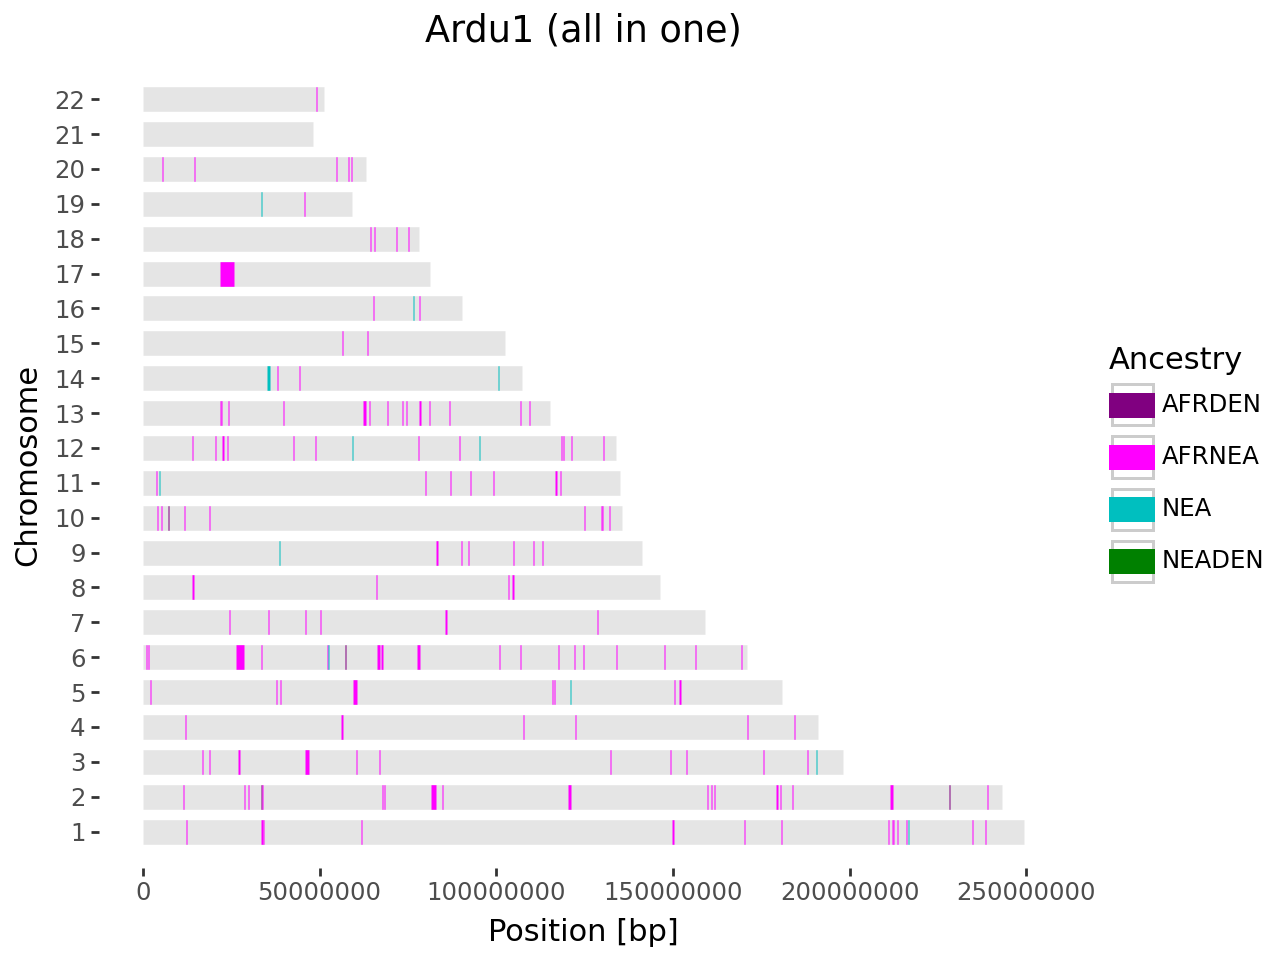

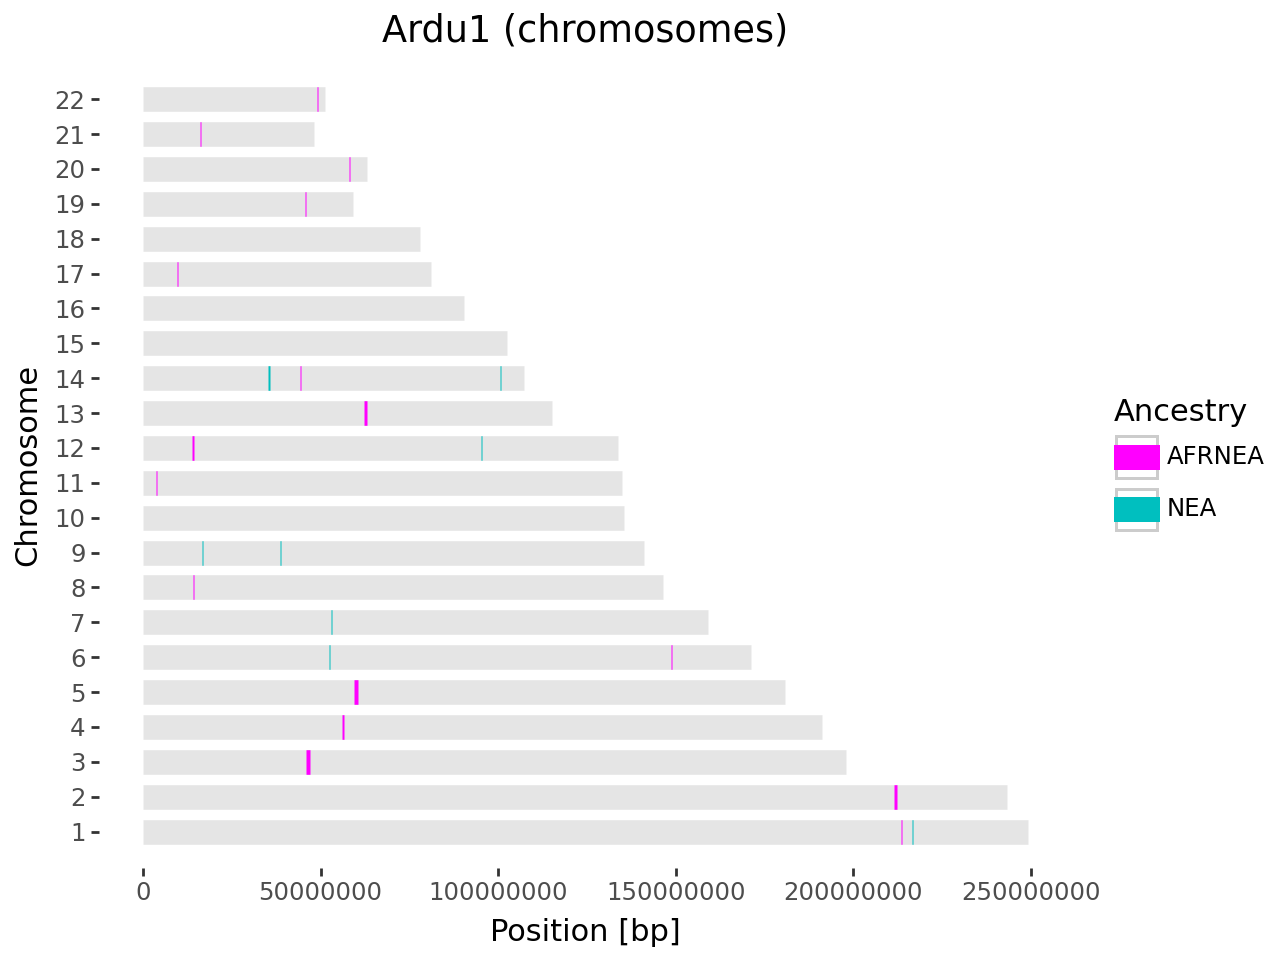

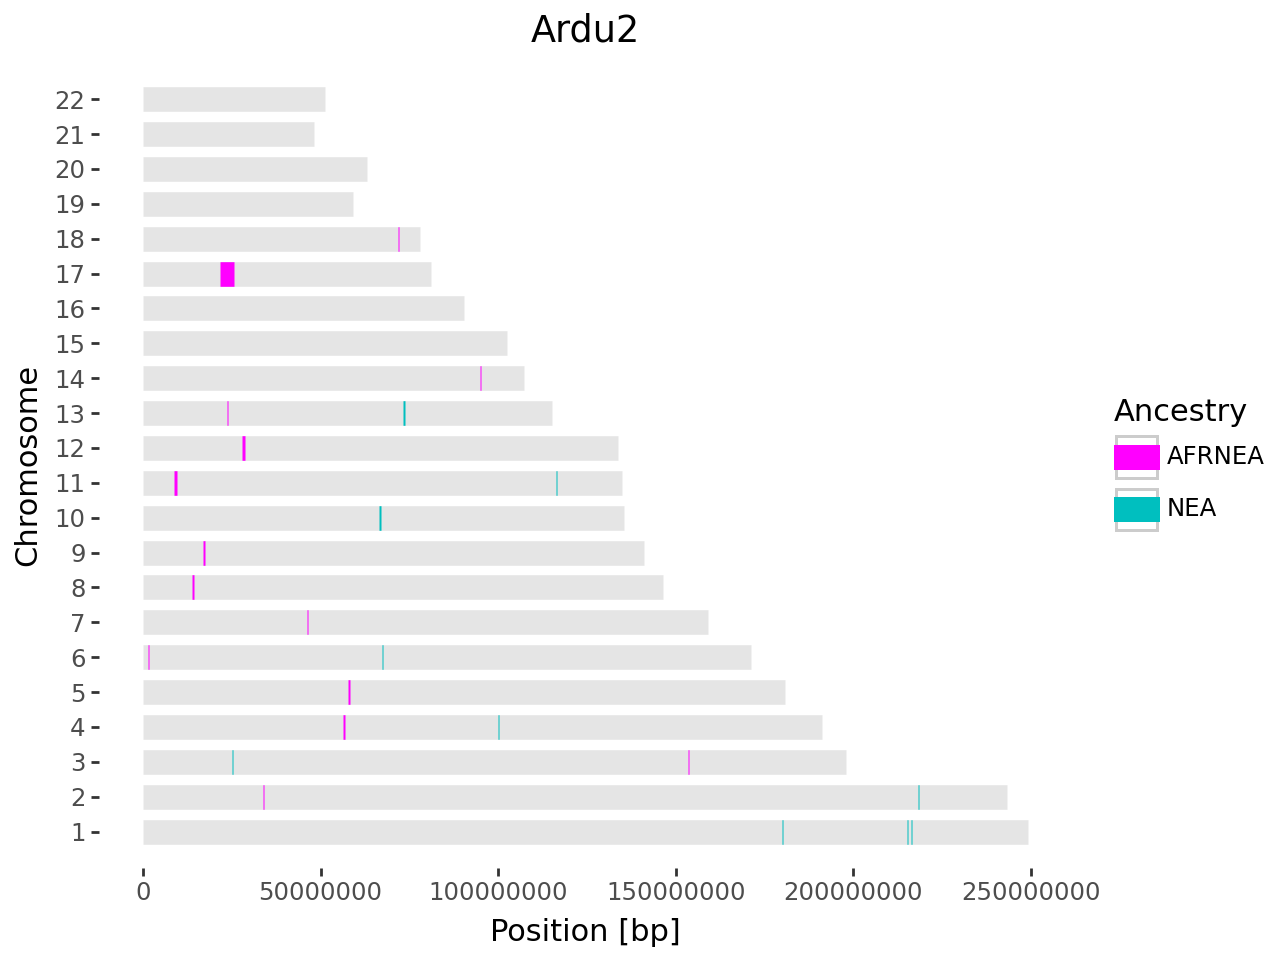

In [307]:
# plot_introgression("DA337")
# plot_introgression("NEO306")
# plot_introgression("La727")
plot_introgression("Ardu1", 
    df = pd.read_csv(f"../processed-data/admixfrog-allentoft/Ardu1/Ardu1.rle.xz"),
    suffix=" (all in one)")
plot_introgression("Ardu1", suffix=" (chromosomes)")
plot_introgression("Ardu2")
# plot_introgression('IVLS09KT')
# plot_introgression('X15')
# plot_introgression('Ma554')

# Ardu1 Results Comparison

In [15]:
metadata = pd.read_csv("../processed-data/metadata_allentoft_et_al_2024.csv", index_col="Individual ID")
metadata.loc["Ardu1"]

Site                                   Ardu, Harju
Country                                    Estonia
Region                              NorthernEurope
Group label                  Estonia_Neolithic_CWC
Latitude                                      59.1
Longitude                                    25.36
Data source               Saag_CurrentBiology_2017
Age (upper)                                  4,821
Age (lower)                                  4,455
Age average                                  4,638
Dating                                      direct
Sex                                             XY
Y haplogroup (major)                           R1a
Y haplogroup (derived)                     R1a1a1b
Coverage                                      0.56
Average GP                                   0.993
Flag                                             0
Cluster ID                             1.2.3.2.2.1
Cluster fine                EuropeNE_4800BP_3000BP
Cluster global                E

In [305]:
# ardu1_chrom = read_sample_chroms("Ardu1")
# ardu1_all = filter_output(
#     pd.read_csv(f"../processed-data/admixfrog-allentoft/Ardu1/Ardu1.rle.xz"))
# # plt.bar(
# #     ardu1_chrom['target'].value_counts(normalize=True))
# comp = pd.concat(
#     [
#         pd.DataFrame(ardu1_all['target'].value_counts(normalize=True)).T, 
#         pd.DataFrame(ardu1_chrom['target'].value_counts(normalize=True)).T
#         ]
#     ).fillna(0)
# comp.index = ["all", "chromosome"]
# comp.plot(kind='bar', stacked=True)
# plt.legend(title="Annotation", **legend_kwargs())
# plt.title("Ardu1 Ancestry Proportions")
# plt.show()

In [304]:
# Read in the annotation % summary from the all-in-one run
res2_all = pd.read_csv("../processed-data/admixfrog-allentoft/Ardu1/Ardu1.res2.xz")
print("all-in-one results: ")
display(res2_all)

# Read in the annotation % summaries for each respective chromosome and aggregate them
autosome_total = sum(chrom_lens.values())
chrom_res2s = []
for i in range(1, 23):
    df_i = pd.read_csv(f"../processed-data/admixfrog-allentoft/Ardu1/{i}.res2.xz")
    # Scale the % values for mean, sd, and lower/upper bounds by the corresponding hg19 chromosome length [bp]
    df_i.iloc[:, 1:] = df_i.iloc[:, 1:] * chrom_lens[i]
    chrom_res2s.append(df_i)
# Concatenate all these scaled individual dfs, them divide by the sum of autosome lengths
chrom_res2s_concat = pd.concat(chrom_res2s)
res2_chroms = pd.DataFrame(columns=chrom_res2s_concat.columns)
res2_chroms["state"] = chrom_res2s_concat["state"].unique().tolist()
# Sum up the mean and upper/lower bounds, then divide by autosome length
res2_chroms = chrom_res2s_concat.groupby("state").sum() / autosome_total

# Calculate the standard deviation
sd_tmp = chrom_res2s_concat.loc[:, ['state', 'sd']]
# Propogate error by summing the squares, taking the square root of the sum, and dividing by the total autosome length
sd_tmp['sd'] = sd_tmp['sd'] ** 2
sd_tmp = sd_tmp.groupby("state").sum().apply(lambda x: x**(1/2))
sd_tmp['sd'] = sd_tmp['sd'] / autosome_total
# Finally, transfer the results back to the dataframe with the mean etc.
res2_chroms['sd'] = sd_tmp['sd']

print("chromosome aaggregated results:")
display(res2_chroms)

all-in-one results: 


,state,mean,sd,lower,upper
0,AFR,0.972839,0.000408,0.972040,0.973638
1,DEN,0.002913,0.000129,0.002659,0.003166
2,NEA,0.024248,0.000392,0.023479,0.025017


chromosome aaggregated results:


,mean,sd,lower,upper
state,,,,
AFR,0.972964,0.000407,0.969408,0.976520
DEN,0.002726,0.000111,0.001878,0.003573
NEA,0.024310,0.000395,0.020869,0.027752
